In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from PIL.ImageOps import mirror
from PIL import ImageEnhance
import time
import numpy as np
import pandas as pd

### Image Augmentation.
To better improve classification, create a mirror and blur image for each image. 

In [2]:
# path. Use a image to test the blur and image
path = './raw_images/0/1_56.jpg'


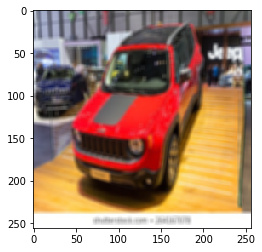

In [7]:
# blur image test

# resize the image to 256 x 256 for less computation power while maintain content

# open the image
img = Image.open(path)

# resize the image
img = img.resize((256, 256))

# blur the image at radius 4
# ImageFilter.BoxBlur(radius). The radius in each direction to blur. higher, the more blur
img_b = img.filter(ImageFilter.BoxBlur(2))


plt.imshow(img_b);

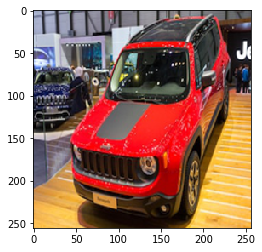

In [19]:
# flip images

img_r = img.crop(box = (10, 10, 220, 220)).resize((256,256))

plt.imshow(img_r)

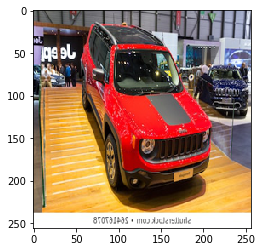

In [68]:
# mirror image test

img_m = mirror(img)

plt.imshow(img_m);

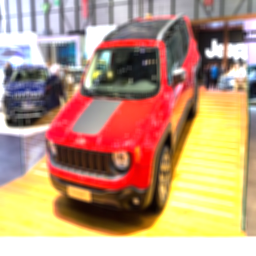

In [83]:
ImageEnhance.Brightness(img_b).enhance(1.5)

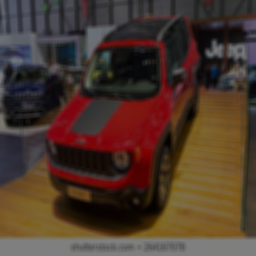

In [85]:
ImageEnhance.Brightness(img_b).enhance(.5)

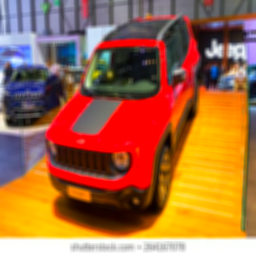

In [87]:
ImageEnhance.Color(img_b).enhance(2)

## Helper function for image augmentation.

This function will augmentate each image in a given directory. Use a for-loop for mulitple folders.

In [2]:
def image_aug(file_dir, sav_file_dir, size):
    # the path to locate the directory
    path = file_dir
    
    # open the entire directory for all the images in the folder. The raw images
    images = os.listdir(path)
    
    # set counter for completed image augmentation
    picture_count = 0
    
    # loop through each image in the folder for blur and mirror
    for image in images: 

        try:
            
            #open the image and convert each image to RGb to ensure each image is RGB
            img = Image.open(path + image).convert('RGB')
            

            # resize the images to size x size
            img_resize = img.resize((size, size))
            
            # save the resized image to sav_file_directory
            img_resize.save(f'{sav_file_dir}resize_{picture_count}.jpg')
            
            

            # crop images to (10, 20, 250, 220) to trim off some edges
            img_crop = img_resize.copy().crop(box = (10, 20, 250, 220)).resize((size,size)) 
            
            # save the resized image to sav_file_directory
            img_crop.save(f'{sav_file_dir}crop_{picture_count}.jpg')
            
            
            
            # image blur. use.copy() to allow original image for mirror
            img_b = img_resize.copy().filter(ImageFilter.BoxBlur(4))
            
            #save blur image to sav_file_directory
            img_b.save(f'{sav_file_dir}blur_{picture_count}.jpg')


            
            # mirror the image
            img_m = mirror(img_resize.copy())

            # save mirror image to sav_file_directory
            img_m.save(f'{sav_file_dir}mirror_{picture_count}.jpg')
            
            # crop mirror images to (10, 20, 250, 220) to trim off some edges
            img_crop_m = img_m.copy().crop(box = (10, 20, 250, 220)).resize((size,size)) 
            
            # save the resized image to sav_file_directory
            img_crop_m.save(f'{sav_file_dir}crop_m_{picture_count}.jpg')
                      
            
            
            # mirror and blur 
            img_m_b = img_m.copy().filter(ImageFilter.BoxBlur(2))
            
            # save mirror and blur image to sav_file_dir
            img_m_b.save(f'{sav_file_dir}mirror_blur_{picture_count}.jpg')
            
            
            
            # bright the image 
            img_br = ImageEnhance.Brightness(img_resize.copy()).enhance(1.5)
            
            # save bright images to sav_file_directory
            img_br.save(f'{sav_file_dir}bright_{picture_count}.jpg')
            
            
            
            # darken the image
            img_dr = ImageEnhance.Brightness(img_resize.copy()).enhance(0.5)
            
            # save darken images to sav_file_directory
            img_dr.save(f'{sav_file_dir}dark_{picture_count}.jpg')
            
            
            
            # enhance the color 
            img_c = ImageEnhance.Color(img_resize.copy()).enhance(2)
            
            # save the enhance color to sav_file_directory
            img_c.save(f'{sav_file_dir}color_{picture_count}.jpg')
            
            # crop images to (10, 20, 250, 220) to trim off some edges
            img_crop_color = img_c.copy().crop(box = (10, 20, 250, 220)).resize((size,size)) 
            
            # save the resized image to sav_file_directory
            img_crop_color.save(f'{sav_file_dir}crop_color_{picture_count}.jpg')
            

            
            
            # gray out the color 
            img_g = ImageEnhance.Color(img_resize.copy()).enhance(.1)
            
            # save the gray image to sav_file_directory
            img_g.save(f'{sav_file_dir}gray_{picture_count}.jpg')
            
            
            
            # brighten the mirror and blur
            img_br_m_c = ImageEnhance.Brightness(img_m_b.copy()).enhance(1.5)
            
            # save brighten, mirror and blur to sav_file_directory
            img_br_m_c.save(f'{sav_file_dir}bright_mirror_blur_{picture_count}.jpg')
            
        except:
            pass
        
        # progress progress of augmentation
        if picture_count % 50 == 0:
            print(f'Augmentated {picture_count} images into {sav_file_dir} directory.')
        
        # add a counter to the picture_aug_count
        picture_count += 1
     

In [4]:
#timer for the function execution. 
%time

# for folder 0 to 3
for i in range(4):
    image_aug(f'./raw_images/{i}/', f'./pretrain/{i}/', 224)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Augmentated 0 images into ./pretrain/0/ directory.
Augmentated 50 images into ./pretrain/0/ directory.
Augmentated 100 images into ./pretrain/0/ directory.
Augmentated 150 images into ./pretrain/0/ directory.
Augmentated 0 images into ./pretrain/1/ directory.
Augmentated 50 images into ./pretrain/1/ directory.
Augmentated 100 images into ./pretrain/1/ directory.
Augmentated 150 images into ./pretrain/1/ directory.
Augmentated 200 images into ./pretrain/1/ directory.
Augmentated 0 images into ./pretrain/2/ directory.
Augmentated 50 images into ./pretrain/2/ directory.
Augmentated 100 images into ./pretrain/2/ directory.
Augmentated 150 images into ./pretrain/2/ directory.
Augmentated 200 images into ./pretrain/2/ directory.
Augmentated 0 images into ./pretrain/3/ directory.
Augmentated 50 images into ./pretrain/3/ directory.
Augmentated 100 images into ./pretrain/3/ directory.
Augmentated 150 images into ./pretrain/3/ direc